[1] Package import

In [1]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#sigmoid function
def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))


[2] make array and initilize value

In [2]:
datanum= 118

epoch = 10000000

# array for graph
train_loss_Array=np.zeros((epoch,1))
train_AC_Array=np.zeros((epoch,1))

x_epoch=np.arange(epoch)


[3] read train data

In [3]:
data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

x= pointX
y= pointY


[4] Processing Gradient decent(training)

In [4]:
lr=0.001 #learning Rate

#theta
W6=np.random.randn(1)*0.1
W5=np.random.randn(1)*0.1
W4=np.random.randn(1)*0.1
W3=np.random.randn(1)*0.1
W2=np.random.randn(1)*0.1
W1=np.random.randn(1)*0.1
W0=np.random.randn(1)*0.1

#temporay theta for multiply with lr
W6_=np.zeros(1)
W5_=np.zeros(1)
W4_=np.zeros(1)
W3_=np.zeros(1)
W2_=np.zeros(1)
W1_=np.zeros(1)
W0_=np.zeros(1)

for iter in range(epoch):
    
    #calculate the train loss
    z =W0 + W1 * x + W2 * y + W3 * (x+y) + W4 * (x ** 2) + W5 * (y**2) + W6 * (x**2+y**2)
    h =sigmoid(z)
    loss=-(label*np.log(h)+(1-label)*np.log(1-h))
    loss=1/datanum*np.sum(loss)
    train_loss_Array[iter]=loss
    
    #calculate the train AC
    trainPY=np.where(h>=0.5,1.,0.)
    ac=((trainPY == label).sum())/datanum
    train_AC_Array[iter]=ac
        
    #미분 해서 구함
    W0_ = 1/datanum*np.sum(h-label)
    W1_ = 1/datanum*np.sum((h-label)*x)
    W2_ = 1/datanum*np.sum((h-label)*y)
    W3_ = 1/datanum*np.sum((h-label)*(x+y))
    W4_ = 1/datanum*np.sum((h-label)*(x**2))
    W5_ = 1/datanum*np.sum((h-label)*(y**2))
    W6_ = 1/datanum*np.sum((h-label)*(x**2+y**2))
    

    # update the parameters
    W0 = W0 - W0_ * lr
    W1 = W1 - W1_ * lr
    W2 = W2 - W2_ * lr
    W3 = W3 - W3_ * lr
    W4 = W4 - W4_ * lr
    W5 = W5 - W5_ * lr
    W6 = W6 - W6_ * lr
    

[5] Plot the training data

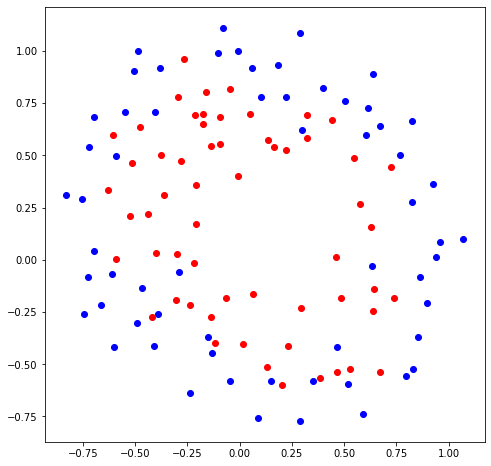

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

[6] Write down the high dimensional function g(x,y;θ)

g(x,y;θ) =   

[7] plotting training loss

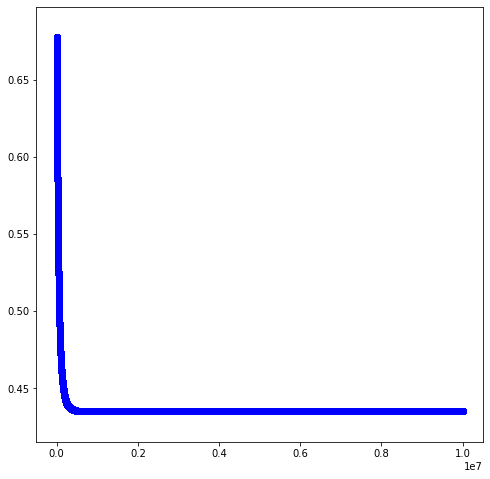

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(x_epoch,train_loss_Array,c="b")
plt.show()

[8] Plot the training accuracy

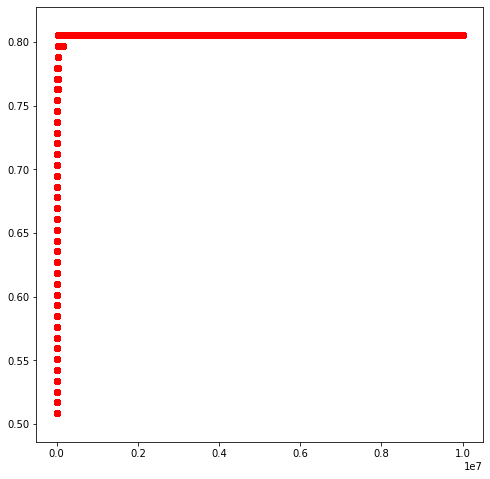

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(x_epoch,train_AC_Array,c="r")
plt.show()

[9] Write down the final training accuracy

In [8]:
print("final training AC is :" )
print(train_AC_Array[epoch-1])

final training AC is :
[0.80508475]


[10] Plot the optimal classifier superimposed on the training data 

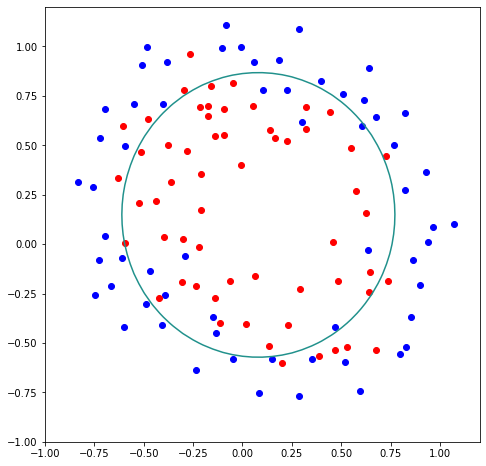

In [9]:
x_ = np.arange(-1.0, 1.25, 0.05)
y_ = np.arange(-1.0, 1.25, 0.05)
X, Y = np.meshgrid(x_, y_)
Z =W0 + W1 * X + W2 * Y + W3 * (X+Y) + W4 * (X ** 2) + W5 * (Y**2) + W6 * (X**2 + Y**2)


plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.gca().set_aspect('equal', adjustable='box')
plt.contour(X, Y, Z,levels=0)
plt.show()